In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./data/gm2offline_ana_merged.root")
#f = r.TFile("./gm2offline_ana_7893458_15937.00027.root")
#f.cd("clusterTree")
f.ls()

TFile**		./data/gm2offline_ana_merged.root	chain files
 TFile*		./data/gm2offline_ana_merged.root	chain files
  KEY: TTree	clusters;1	clusters


In [3]:
t = f.Get("clusters")

In [4]:
t.Print()

******************************************************************************
*Tree    :clusters  : clusters                                               *
*Entries : 101741458 : Total =      6918577711 bytes  File  Size = 2847103962 *
*        :          : Tree compression factor =   2.43                       *
******************************************************************************
*Br    0 :energy    : energy/D                                               *
*Entries :101741458 : Total  Size=  813950120 bytes  File Size  =  774777480 *
*Baskets :      187 : Basket Size=    5676215 bytes  Compression=   1.05     *
*............................................................................*
*Br    1 :time      : time/D                                                 *
*Entries :101741458 : Total  Size=  813949738 bytes  File Size  =  776764309 *
*Baskets :      187 : Basket Size=    5676215 bytes  Compression=   1.05     *
*..................................................

In [5]:
c = r.TCanvas()

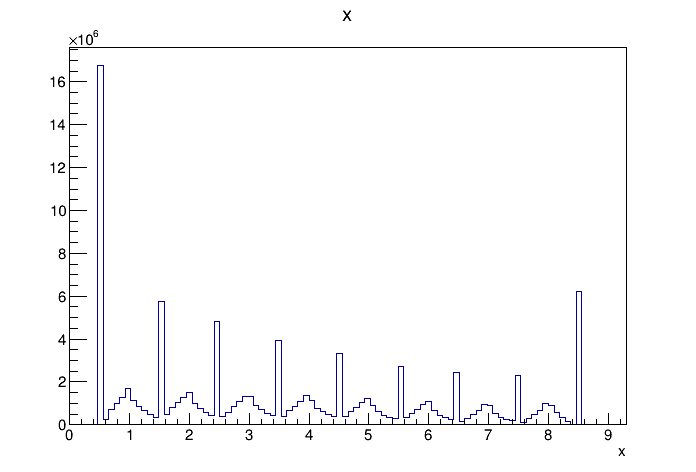

In [6]:
t.Draw("x")
c.Draw()

In [6]:
#t.Draw("x:y:energy", "energy>1660 && energy<6000 && time*1.25 > 30000 && caloNum==2", "colz")
#t.Draw("energy:x:y","energy>1660 && energy<6000 && time*1.25 > 30000 && caloNum==2","PROFCOLZ")
#c.Draw()

In [7]:
h2 = r.TH3D("h2","h2",6000,0,6000,600,0,6,450,0,9)
#h2 = r.TH2D()
t.Draw("x:y:energy>>h2", "energy>1660 && energy<6000 && time*1.25 > 30000 && caloNum==2", "goff")
h2 = r.gDirectory.Get("h2")

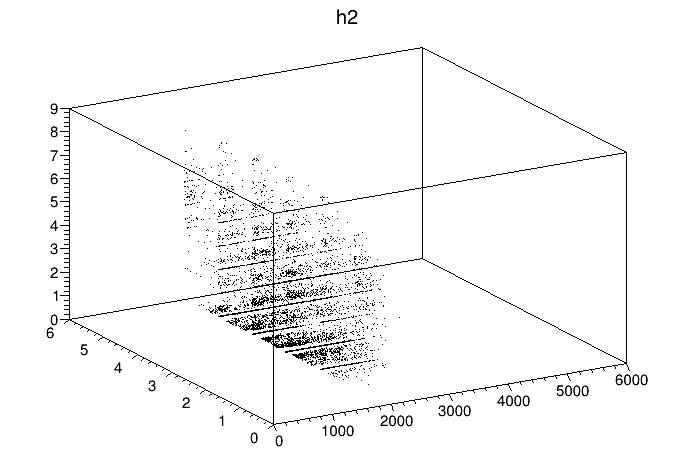

In [8]:
#h2.Draw()
#c.Draw()

In [13]:
h2.GetXaxis().SetRangeUser(0,3000)
h2.Project3DProfile("yz").Draw("colz")
c.Draw()

NameError: name 'h2' is not defined

In [10]:
#h14 = r.TH2D()
h14 = r.TH3D("h14","h14",4340,1660,6000,600,0,6,450,0,9)
t.Draw("x:y:energy>>h14", "energy>1660 && energy<6000 && time*1.25 > 30000 && caloNum==14", "goff")
h14 = r.gDirectory.Get("h14")

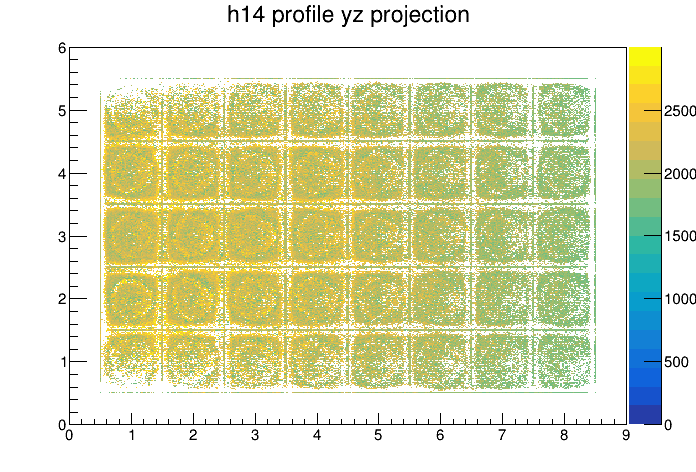

In [11]:
h14.GetXaxis().SetRangeUser(0,3000)
h14.Project3DProfile("yz").Draw("colz")
c.Draw()

In [ ]:
h8 = r.TH3D("h8","h8",4340,1660,6000,600,0,6,450,0,9)
t.Draw("x:y:energy>>h8", "energy>1660 && energy<6000 && time*1.25 > 30000 && caloNum==8", "goff")
h8 = r.gDirectory.Get("h8")

In [ ]:
h8.GetXaxis().SetRangeUser(0,3000)
h8.Project3DProfile("yz").Draw("colz")
c.Draw()

In [ ]:
h20 = r.TH3D("h20","h20",4340,1660,6000,600,0,6,450,0,9)
#h14 = r.TH2D("h14","h14",60,0,6,45,0,9)
t.Draw("x:y:energy>>h20", "energy>1660 && energy<6000 && time*1.25 > 30000 && caloNum==20", "goff")
h20 = r.gDirectory.Get("h20")

In [ ]:
h20.GetXaxis().SetRangeUser(0,3000)
h20.Project3DProfile("yz").Draw("colz")
c.Draw()

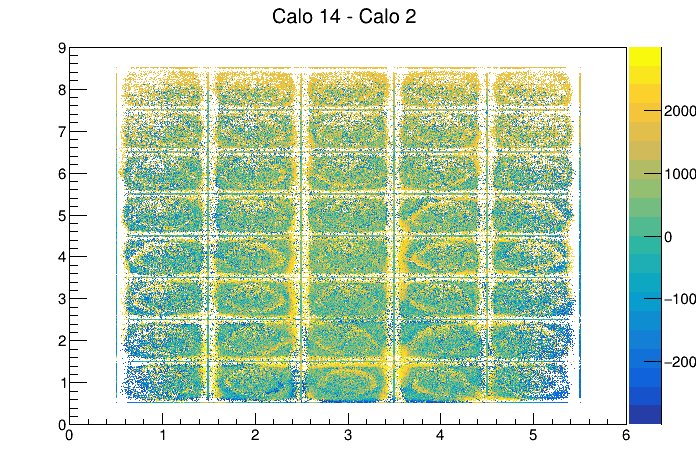

In [13]:
hdiff = h14.Project3DProfile("zy").Clone()#.Rebin2D(10)
hdiff.SetTitle("Calo 14 - Calo 2")
hdiff.Add(h2.Project3DProfile("zy").Clone(),-1)#.Rebin2D(10),-1)
hdiff.Draw("COLZ")
c.Draw()

In [10]:
projectionVec = []
for i in range(24):
    calonum = i+1
    calostring = "h"+str(i+1)
    hi = r.TH3D(calostring,calostring,4340,1660,6000,30,0,6,45,0,9)
    projectionVec.append(hi.Clone(calostring))
    print(i)
print(projectionVec)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
[<ROOT.TH3D object ("h1") at 0x7ffffcc0b8a0>, <ROOT.TH3D object ("h2") at 0x7ffffcac3dc0>, <ROOT.TH3D object ("h3") at 0x7ffffc97b1c0>, <ROOT.TH3D object ("h4") at 0x7ffffcd2b870>, <ROOT.TH3D object ("h5") at 0x7ffffc9ee5f0>, <ROOT.TH3D object ("h6") at 0x7ffffcd0b930>, <ROOT.TH3D object ("h7") at 0x7ffffccf39e0>, <ROOT.TH3D object ("h8") at 0x7ffffc9885c0>, <ROOT.TH3D object ("h9") at 0x7ffffcd09d40>, <ROOT.TH3D object ("h10") at 0x7ffffc9771c0>, <ROOT.TH3D object ("h11") at 0x7ffffcd08b00>, <ROOT.TH3D object ("h12") at 0x7ffffc97d660>, <ROOT.TH3D object ("h13") at 0x7ffffc97f560>, <ROOT.TH3D object ("h14") at 0x7ffffc97f130>, <ROOT.TH3D object ("h15") at 0x7ffffc97d160>, <ROOT.TH3D object ("h16") at 0x7ffffc97cd30>, <ROOT.TH3D object ("h17") at 0x7ffffc998de0>, <ROOT.TH3D object ("h18") at 0x7ffffc9989b0>, <ROOT.TH3D object ("h19") at 0x7ffffc9869f0>, <ROOT.TH3D object ("h20") at 0x7ffffc9865c0>, <ROOT.TH3D object ("h21") 

Starting Calo 1
    Histogram generated
Starting Calo 2
    Histogram generated
Starting Calo 3
    Histogram generated
Starting Calo 4
    Histogram generated
Starting Calo 5
    Histogram generated
Starting Calo 6
    Histogram generated
Starting Calo 7
    Histogram generated
Starting Calo 8
    Histogram generated
Starting Calo 9
    Histogram generated
Starting Calo 10
    Histogram generated
Starting Calo 11
    Histogram generated
Starting Calo 12
    Histogram generated
Starting Calo 13
    Histogram generated
Starting Calo 14
    Histogram generated
Starting Calo 15
    Histogram generated
Starting Calo 16
    Histogram generated
Starting Calo 17
    Histogram generated
Starting Calo 18
    Histogram generated
Starting Calo 19
    Histogram generated
Starting Calo 20
    Histogram generated
Starting Calo 21
    Histogram generated
Starting Calo 22
    Histogram generated
Starting Calo 23
    Histogram generated
Starting Calo 24
    Histogram generated


Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hi (Potential memory leak).
Warning in <TFile::Append>: Replacing ex

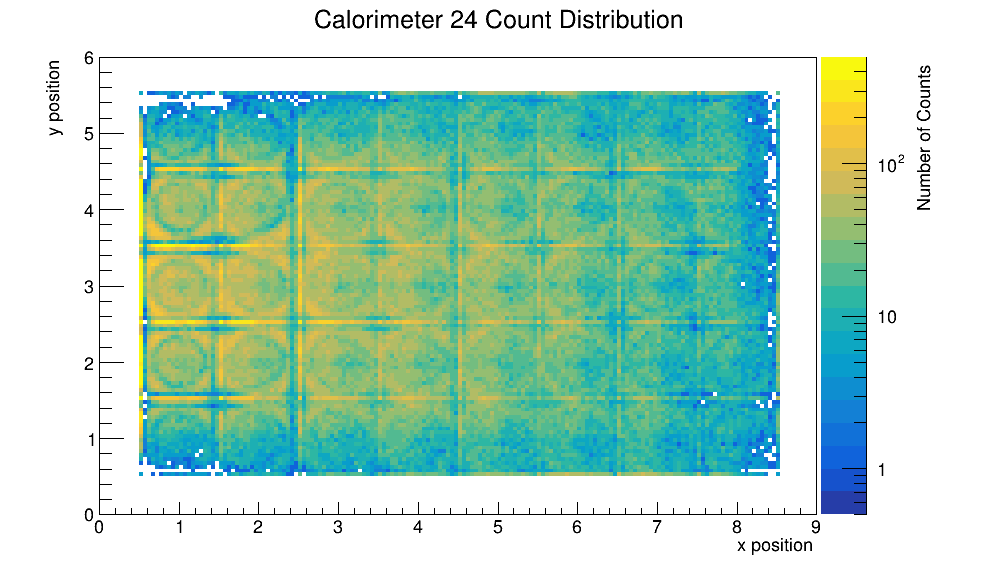

In [73]:
projectionVec = []

for i in range(24):
    print("Starting Calo", i+1)
    calostring = "h"+str(i+1)
    
    hi = r.TH3D("hi","hi",4340,1660,6000,120,0,6,180,0,9)
#    t.Draw("x:y:energy>>hi", "energy>1660 && energy<6000 && time*1.25 > 30000 && time*1.25 < 650000 && caloNum=="+str(i+1), "goff")
    t.Draw("x:y:energy>>hi", "energy>2101.7064342073804 && energy<6000 && time*1.25 > 30000 && time*1.25 < 650000 && caloNum=="+str(i+1), "goff")
    hi = r.gDirectory.Get("hi")
    hi.SetTitle(calostring)
    print("    Histogram generated")
    
    hi.GetXaxis().SetRangeUser(0,3000)
#    hi.Project3DProfile("yz").Draw("colz")
    
    projectionVec.append(hi.Clone(calostring))
    
    c.Draw()

[<ROOT.TH3D object ("h1") at 0x7ffffe8cfd20>, <ROOT.TH3D object ("h2") at 0x7ffffdcedba0>, <ROOT.TH3D object ("h3") at 0x7ffffe8cea60>, <ROOT.TH3D object ("h4") at 0x7ffffe8f2840>, <ROOT.TH3D object ("h5") at 0x7ffffe8e42c0>, <ROOT.TH3D object ("h6") at 0x7ffffe8d7530>, <ROOT.TH3D object ("h7") at 0x7ffffe8d4130>, <ROOT.TH3D object ("h8") at 0x7ffffe8e3500>, <ROOT.TH3D object ("h9") at 0x7ffffe8e3930>, <ROOT.TH3D object ("h10") at 0x7ffffe8e49b0>, <ROOT.TH3D object ("h11") at 0x7ffffe8e4de0>, <ROOT.TH3D object ("h12") at 0x7ffffe8ceff0>, <ROOT.TH3D object ("h13") at 0x7ffffe8cf420>, <ROOT.TH3D object ("h14") at 0x7ffffe8db5a0>, <ROOT.TH3D object ("h15") at 0x7ffffe8db170>, <ROOT.TH3D object ("h16") at 0x7ffffe8d1740>, <ROOT.TH3D object ("h17") at 0x7ffffe8d1310>, <ROOT.TH3D object ("h18") at 0x7ffffe8d1be0>, <ROOT.TH3D object ("h19") at 0x7ffffe8e0480>, <ROOT.TH3D object ("h20") at 0x7ffffe8dfbe0>, <ROOT.TH3D object ("h21") at 0x7ffffe8e1250>, <ROOT.TH3D object ("h22") at 0x7ffffe8e001

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./energyInCalos/001_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/002_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/003_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/004_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/005_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/006_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/007_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/008_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/009_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/010_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/011_count.png has been created
Info in <TCanvas::Print>: png

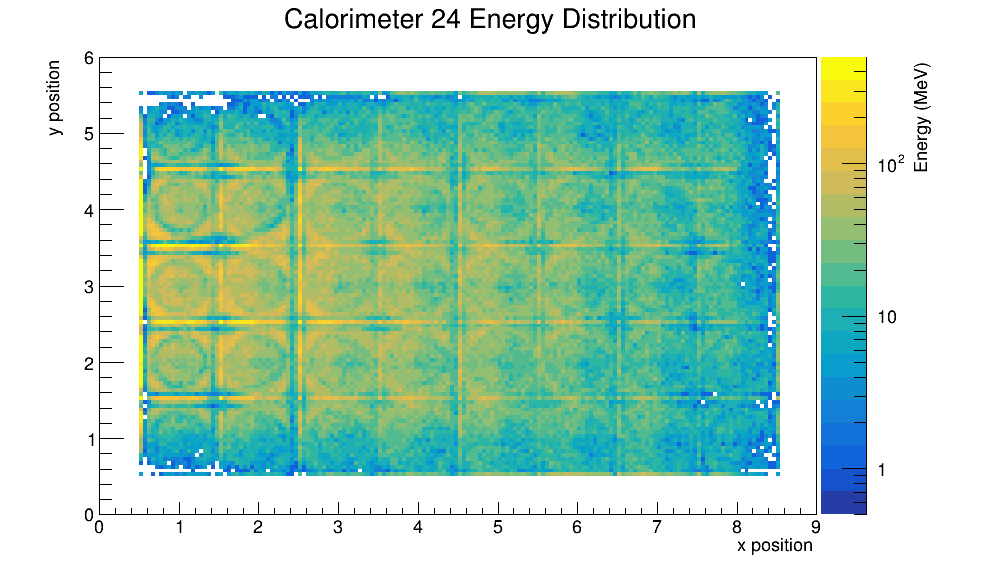

In [70]:
print(projectionVec)
meanVecX = []
c = r.TCanvas("c","c",1000,600)

for i in range(len(projectionVec)):
#    ding = projectionVec[i].Project3DProfile("yz")
    ding = projectionVec[i].Project3D("yz")
#    ding.Rebin2D(2)
    ding.GetZaxis().SetRangeUser(0,500)
    ding.SetTitle("Calorimeter "+str(i+1)+" Energy Distribution")
    ding.GetXaxis().SetTitle("x position")
    ding.GetYaxis().SetTitle("y position")
    ding.GetZaxis().SetTitle("Energy (MeV)")
    ding.GetZaxis().SetNdivisions(555)
    c.SetLogz()
    c.SetRightMargin(0.18)
    ding.Draw("COLZ")
    c.Draw()
    c.Print("./energyInCalos/"+str(int(i+1)).zfill(3)+"_count.png" )
    meanVecX.append((i+1,ding.GetMean(), ding.GetRMS()))

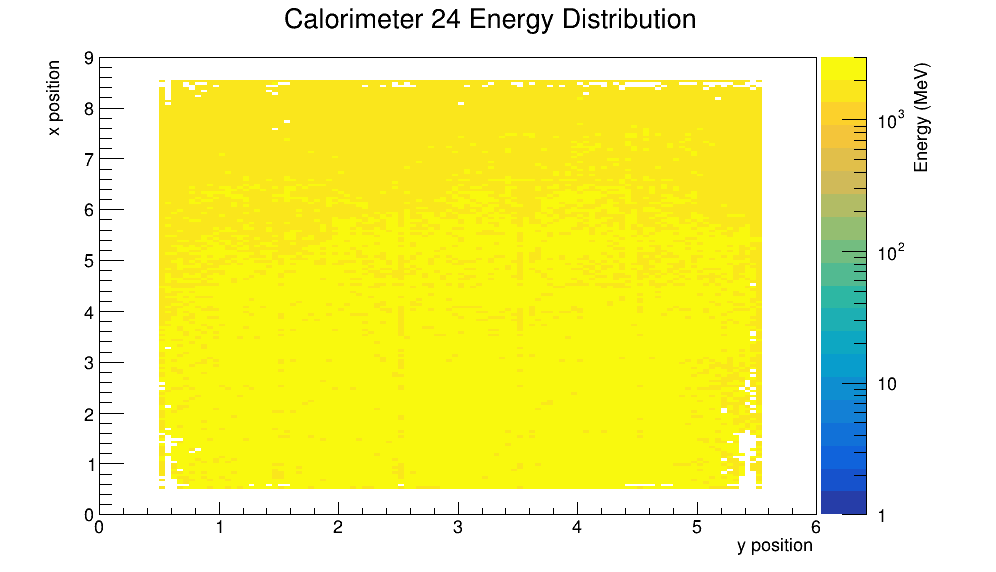

In [9]:
meanVecY = []

for i in range(len(projectionVec)):
    ding = projectionVec[i].Project3DProfile("zy")
    ding.GetZaxis().SetRangeUser(0,3000)
    ding.SetTitle("Calorimeter "+str(i+1)+" Energy Distribution")
    ding.GetXaxis().SetTitle("y position")
    ding.GetYaxis().SetTitle("x position")
    ding.GetZaxis().SetTitle("Energy (MeV)")
    ding.Draw("COLZ")
    c.Draw()
    meanVecY.append((i+1,ding.GetMean(), ding.GetRMS()))

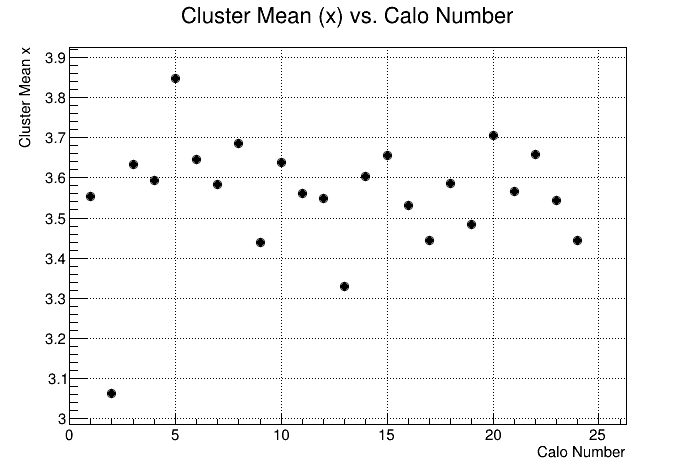

In [24]:
gr = r.TGraph()
for i, (calonum, mean, stdev) in enumerate(meanVecX):
    gr.SetPoint(i,calonum,mean)

c = r.TCanvas()

gr.SetMarkerStyle(20)
gr.SetMarkerSize(1)
gr.SetTitle("Cluster Mean (x) vs. Calo Number")
gr.GetXaxis().SetTitle("Calo Number")
gr.GetYaxis().SetTitle("Cluster Mean x")
gr.Draw("ap")

c.SetGridx()
c.SetGridy()
c.Draw()

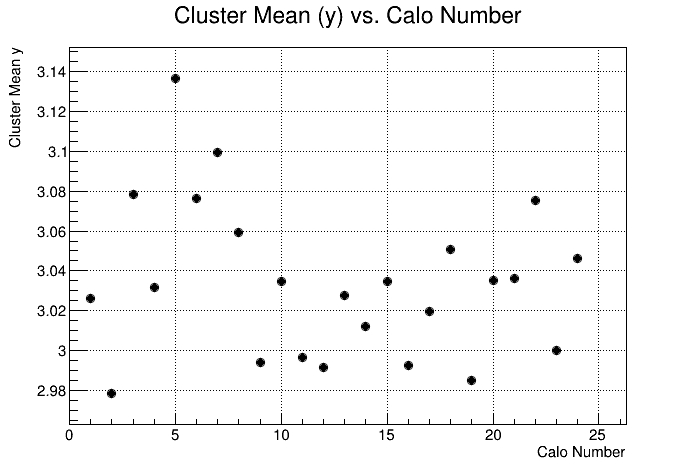

In [22]:
gry = r.TGraph()
for i, (calonum, mean, stdev) in enumerate(meanVecY):
    gry.SetPoint(i,calonum,mean)

c = r.TCanvas()

gry.SetMarkerStyle(20)
gry.SetMarkerSize(1)
gry.SetTitle("Cluster Mean (y) vs. Calo Number")
gry.GetXaxis().SetTitle("Calo Number")
gry.GetYaxis().SetTitle("Cluster Mean y")
gry.Draw("ap")

c.SetGridx()
c.SetGridy()
c.Draw()

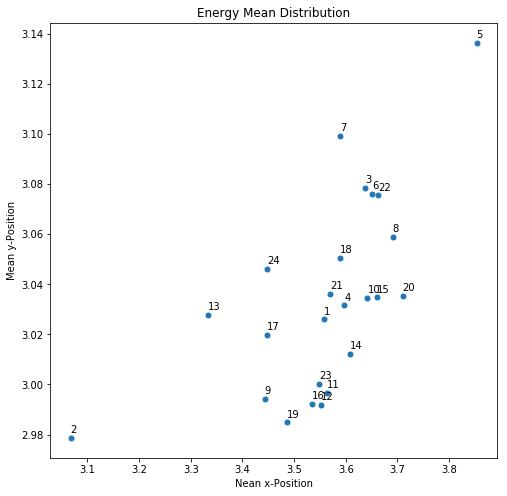

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
CaloNum, MeanX, StdX = zip(*meanVecX)
CaloNum2, MeanY, StdY = zip(*meanVecY)
plt.xlabel('Nean x-Position')
plt.ylabel('Mean y-Position')
plt.title('Energy Mean Distribution')
plt.errorbar(x = MeanX, y = MeanY, yerr = 0, xerr = 0, ls='none',markersize=5,fmt='o')
for i,(ci,MeanX,StdX) in enumerate(meanVecX):
    ax.annotate(ci, xy=(MeanX,MeanY[i]), xytext=(0,5), textcoords='offset points')

In [60]:
print(ding.GetNbinsX(),ding.GetNbinsX())
entriesVec = []
contentVec = []
for i in range(120):
    for j in range(120):
        binnum = ding.GetBin(i,j)
        if (ding.GetBinEntries(binnum) > 0):
            entriesVec.append(ding.GetBinEntries(binnum))
            contentVec.append(ding.GetBinContent(binnum))
print(ding.GetBin(50,50))
print(ding.GetBinContent(6150))
print(ding.GetBinEntries(6150))

120 120
6150
2129.1666666666665
9.0


In [63]:
print(sum(entriesVec)/float(len(entriesVec)))
meanEnergy = sum(contentVec)/float(len(contentVec))
print(meanEnergy)

37.5164198325821
2101.7064342073804


[<ROOT.TH3D object ("h1") at 0x7ffffe8cfd20>, <ROOT.TH3D object ("h2") at 0x7ffffdcedba0>, <ROOT.TH3D object ("h3") at 0x7ffffe8cea60>, <ROOT.TH3D object ("h4") at 0x7ffffe8f2840>, <ROOT.TH3D object ("h5") at 0x7ffffe8e42c0>, <ROOT.TH3D object ("h6") at 0x7ffffe8d7530>, <ROOT.TH3D object ("h7") at 0x7ffffe8d4130>, <ROOT.TH3D object ("h8") at 0x7ffffe8e3500>, <ROOT.TH3D object ("h9") at 0x7ffffe8e3930>, <ROOT.TH3D object ("h10") at 0x7ffffe8e49b0>, <ROOT.TH3D object ("h11") at 0x7ffffe8e4de0>, <ROOT.TH3D object ("h12") at 0x7ffffe8ceff0>, <ROOT.TH3D object ("h13") at 0x7ffffe8cf420>, <ROOT.TH3D object ("h14") at 0x7ffffe8db5a0>, <ROOT.TH3D object ("h15") at 0x7ffffe8db170>, <ROOT.TH3D object ("h16") at 0x7ffffe8d1740>, <ROOT.TH3D object ("h17") at 0x7ffffe8d1310>, <ROOT.TH3D object ("h18") at 0x7ffffe8d1be0>, <ROOT.TH3D object ("h19") at 0x7ffffe8e0480>, <ROOT.TH3D object ("h20") at 0x7ffffe8dfbe0>, <ROOT.TH3D object ("h21") at 0x7ffffe8e1250>, <ROOT.TH3D object ("h22") at 0x7ffffe8e001

Info in <TCanvas::Print>: png file ./energyInCalos/001_nolog.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/002_nolog.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/003_nolog.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/004_nolog.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/005_nolog.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/006_nolog.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/007_nolog.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/008_nolog.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/009_nolog.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/010_nolog.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/011_nolog.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/012_nolog.png has been created
Info in <TCanvas

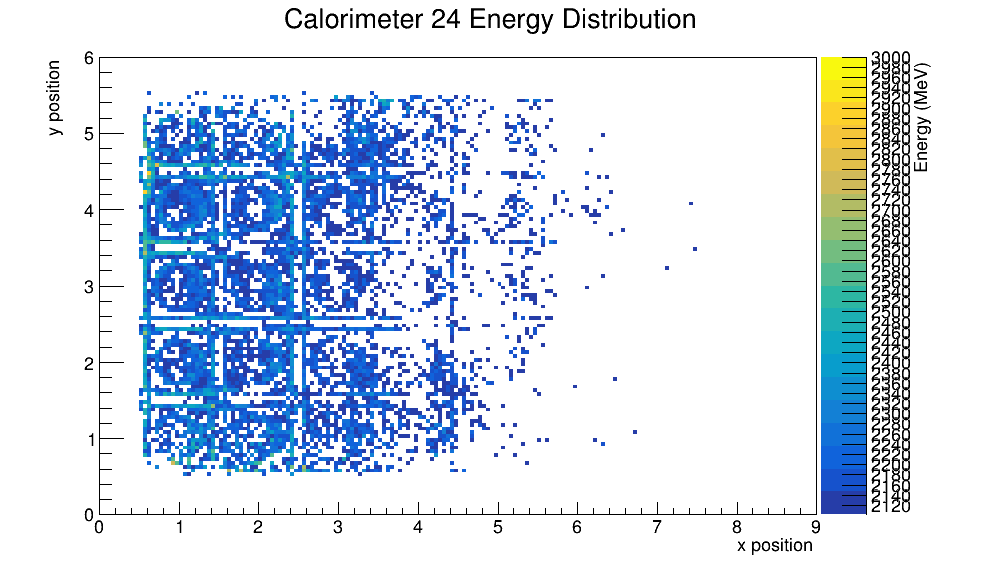

In [64]:
print(projectionVec)
meanVecX = []
c = r.TCanvas("c","c",1000,600)

for i in range(len(projectionVec)):
    ding = projectionVec[i].Project3DProfile("yz")
#    ding.Rebin2D(2)
    ding.GetZaxis().SetRangeUser(meanEnergy,3000)
    ding.SetTitle("Calorimeter "+str(i+1)+" Energy Distribution")
    ding.GetXaxis().SetTitle("x position")
    ding.GetYaxis().SetTitle("y position")
    ding.GetZaxis().SetTitle("Energy (MeV)")
    ding.GetZaxis().SetNdivisions(555)
#    c.SetLogz()
    c.SetRightMargin(0.18)
    ding.Draw("COLZ")
    c.Draw()
    c.Print("./energyInCalos/"+str(int(i+1)).zfill(3)+"_nolog.png" )
    meanVecX.append((i+1,ding.GetMean(), ding.GetRMS()))

In [66]:
print(ding.GetBin(50,50))
print(ding.GetBinContent(9150))
print(ding.GetBinEntries(9150))

9150
2129.1666666666665
9.0


[<ROOT.TH3D object ("h1") at 0x7ffffe8d4130>, <ROOT.TH3D object ("h2") at 0x7ffffdcedba0>, <ROOT.TH3D object ("h3") at 0x7ffffe8e0c10>, <ROOT.TH3D object ("h4") at 0x7ffffe8cfd20>, <ROOT.TH3D object ("h5") at 0x7ffffe8cea60>, <ROOT.TH3D object ("h6") at 0x7ffffe8e42c0>, <ROOT.TH3D object ("h7") at 0x7ffffe8e3930>, <ROOT.TH3D object ("h8") at 0x7ffffe8e3500>, <ROOT.TH3D object ("h9") at 0x7ffffe8db5a0>, <ROOT.TH3D object ("h10") at 0x7ffffe8db170>, <ROOT.TH3D object ("h11") at 0x7ffffe8e1680>, <ROOT.TH3D object ("h12") at 0x7ffffe8e1250>, <ROOT.TH3D object ("h13") at 0x7ffffe955450>, <ROOT.TH3D object ("h14") at 0x7ffffe8f2840>, <ROOT.TH3D object ("h15") at 0x7ffffe8e1f20>, <ROOT.TH3D object ("h16") at 0x7ffffe8e2350>, <ROOT.TH3D object ("h17") at 0x7ffffea2ae20>, <ROOT.TH3D object ("h18") at 0x7ffffe8cf420>, <ROOT.TH3D object ("h19") at 0x7ffffe8ceff0>, <ROOT.TH3D object ("h20") at 0x7ffffe8e4de0>, <ROOT.TH3D object ("h21") at 0x7ffffe8e49b0>, <ROOT.TH3D object ("h22") at 0x7ffffea2b25

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./energyInCalos/001_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/002_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/003_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/004_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/005_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/006_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/007_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/008_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/009_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/010_count.png has been created
Info in <TCanvas::Print>: png file ./energyInCalos/011_count.png has been created
Info in <TCanvas::Print>: png

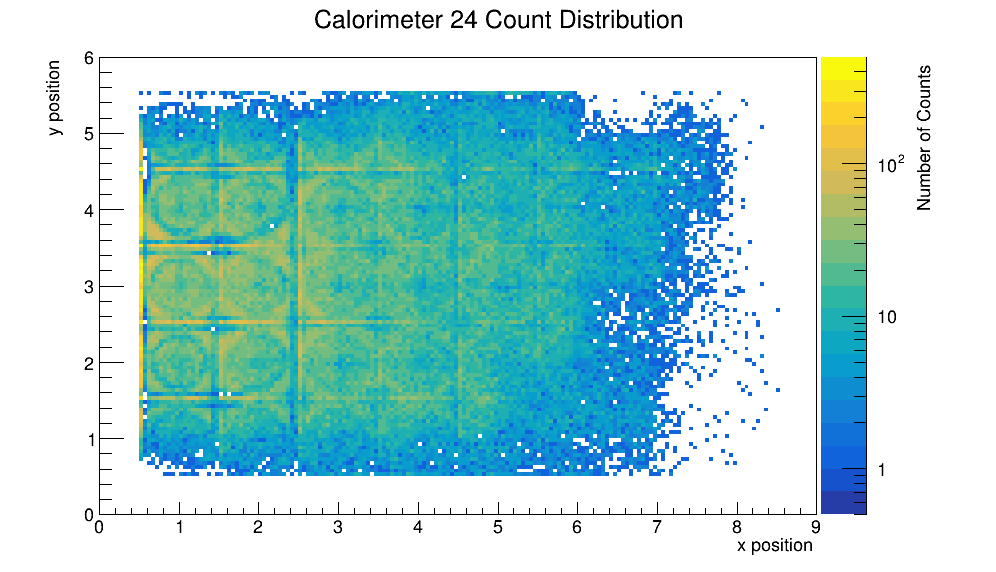

In [74]:
print(projectionVec)
meanVecXCount = []
c = r.TCanvas("c","c",1000,600)

for i in range(len(projectionVec)):
#    ding = projectionVec[i].Project3DProfile("yz")
    ding = projectionVec[i].Project3D("yz")
#    ding.Rebin2D(2)
    ding.GetZaxis().SetRangeUser(0,500)
    ding.SetTitle("Calorimeter "+str(i+1)+" Count Distribution")
    ding.GetXaxis().SetTitle("x position")
    ding.GetYaxis().SetTitle("y position")
    ding.GetZaxis().SetTitle("Number of Counts")
    ding.GetZaxis().SetNdivisions(555)
    c.SetLogz()
    c.SetRightMargin(0.18)
    ding.Draw("COLZ")
    c.Draw()
    c.Print("./energyInCalos/"+str(int(i+1)).zfill(3)+"_count.png" )
    meanVecXCount.append((i+1,ding.GetMean(), ding.GetRMS()))